<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AI:680 Spring 2020 assignment #1
**Exploring and Processing the Data**


In [0]:
#Imports
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [0]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/housing.csv'
house = pd.read_csv(url)
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**Statistics Summary：Find out the nature of data**

In [0]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Histogram**

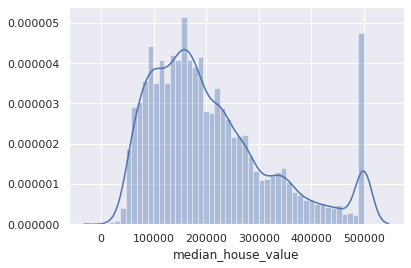

In [0]:

sns.distplot(house['median_house_value'])

**plot a histogram for each numerical attribute:**

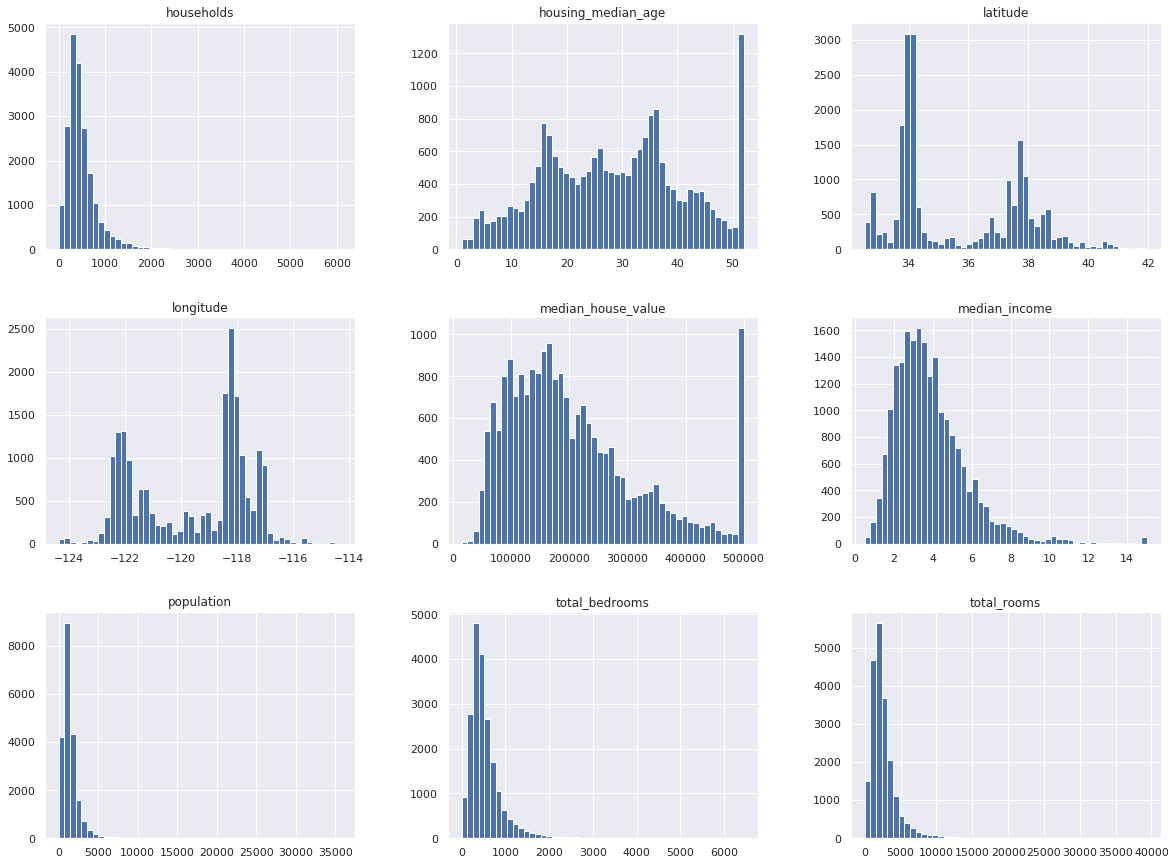

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

**Linear Relationship Ratios：Show what data that has a linear or some kind of relationship to the sale price**

In [0]:
corr_matrix = house.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


**Create a scatterplot**

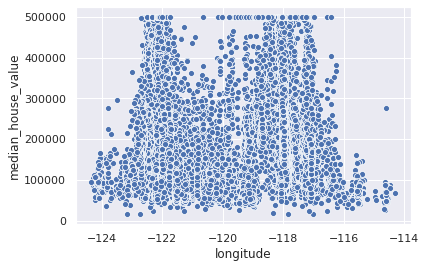

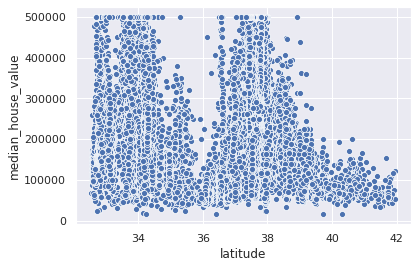

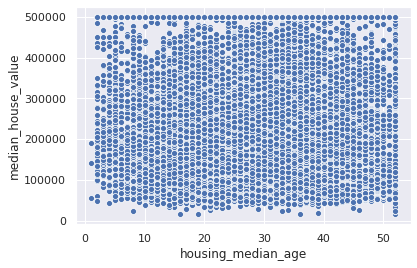

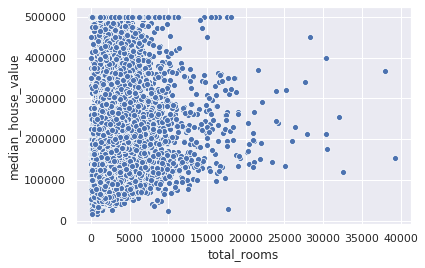

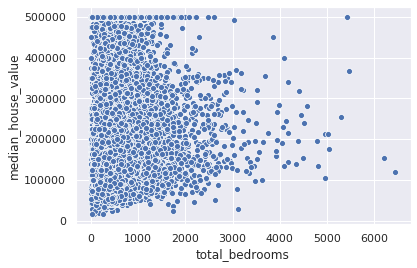

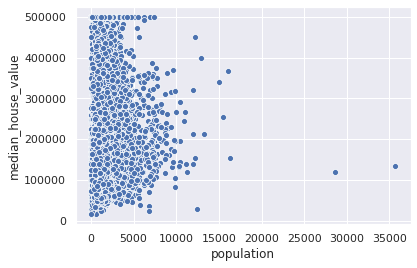

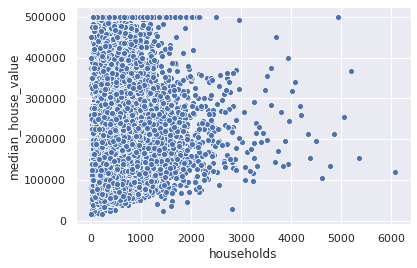

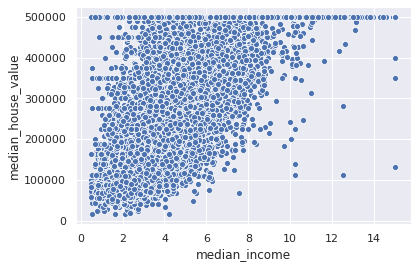

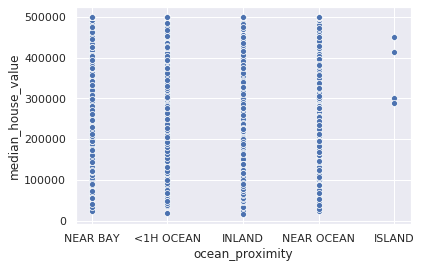

In [0]:
#Scatterplots
sns.set()
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
for column in columns:
    plt.figure()
    sns.scatterplot(house[column], house['median_house_value'])
#this plot reveals that the median_income and median_house_value correlation is indeed very strong,
# you can clearly see the upward trend and the points are not too dispersed.

**Visualizing Geographical Data:Any other useful tool to understand the data better**

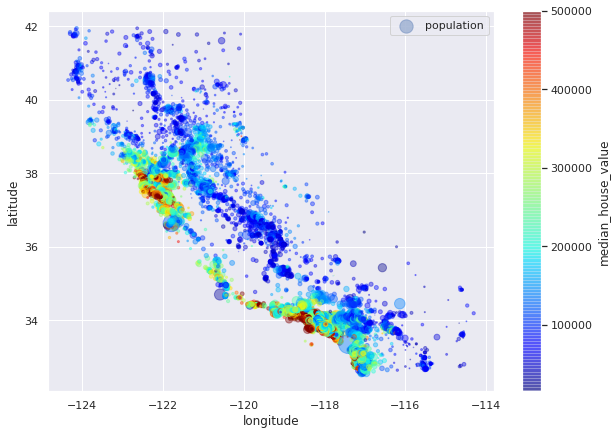

In [0]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=house["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


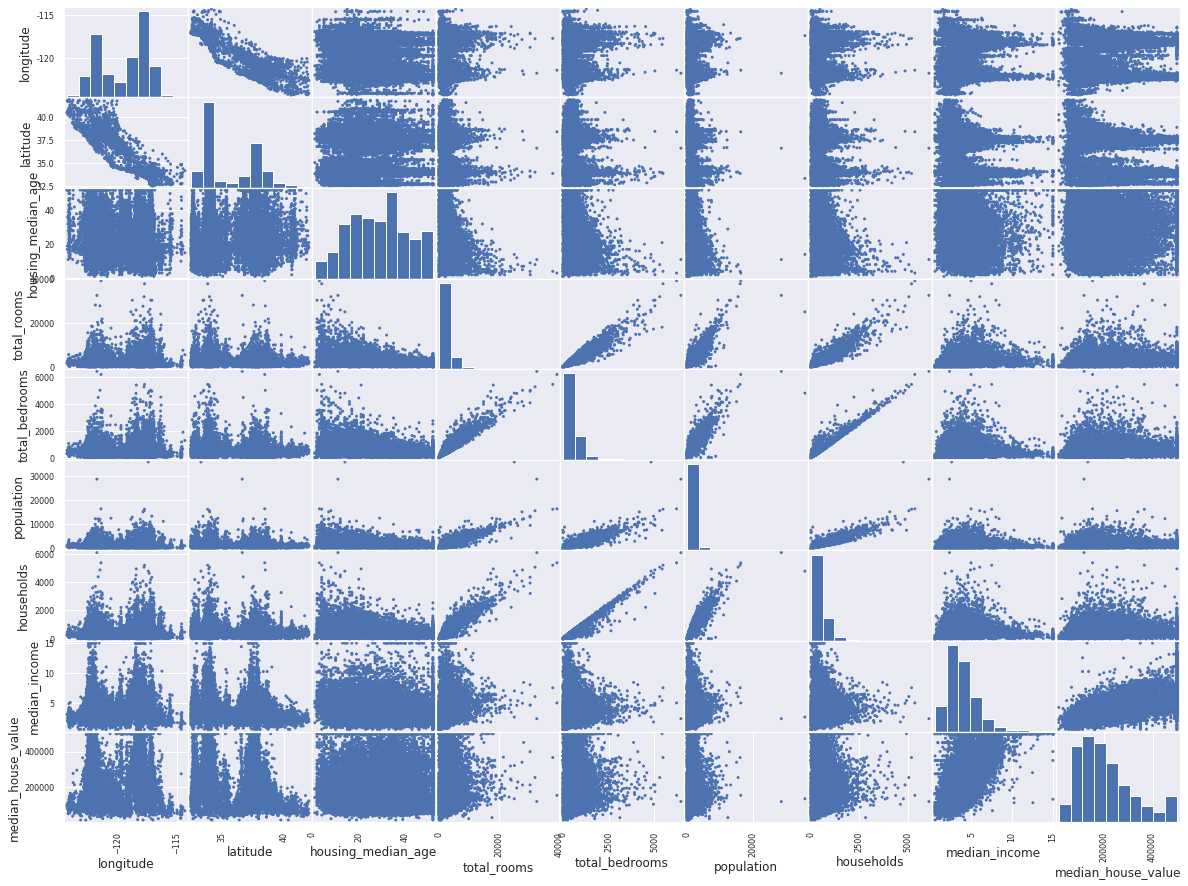

In [0]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(20,15))
scatter_matrix(house,alpha=1, ax=ax)
plt.show()

,Total,Percent
total_bedrooms,207,0.010029
ocean_proximity,0,0.000000
median_house_value,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


**Create a heat map**

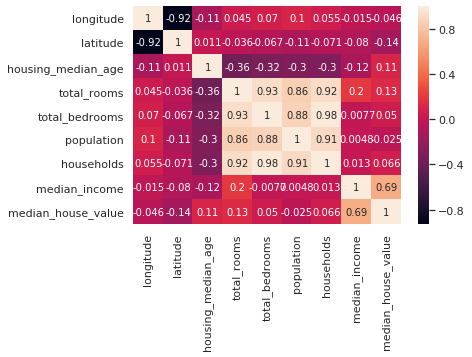

In [0]:
sns.heatmap(house.corr(), annot=True)

**Normalize the data**

In [0]:
# Reload dataset in case data was changed
import pandas as pd 
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/housing.csv'
house = pd.read_csv(url)
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**Drop the less unimportant features**

In [0]:
# Excluding non-numerical data
# alternatively: housing_num = house.select_dtypes(exclude=['object'])
housing_num = house.drop('ocean_proximity', axis=1)

In [0]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


**Drop features which has many NaN values**

In [0]:

house=housing_num.dropna(subset=["total_bedrooms"]) 


In [0]:
#Missing data
# Calculates the percentage of data missing for all features
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
median_house_value,0,0.0
median_income,0,0.0
households,0,0.0
population,0,0.0
total_bedrooms,0,0.0
total_rooms,0,0.0
housing_median_age,0,0.0
latitude,0,0.0
longitude,0,0.0


**create the ANN model using Keras - explain each step**

In [0]:
dataset =house.values

In [0]:
# SalePrice goes into Y and the other values into X
X = dataset[:,:8]
Y = dataset[:,8]

Building and Training our Neural Network

In [0]:
#Create Model
model = Sequential([ #Create the single input layer
    Dense(32, activation = 'relu', input_shape = (8,)), # Creating only two hidden layers as the NN becomes harder to train as more hidden layers are added.
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'), #Create the signle output layer since this is NN is regression
])

**fit the model**

In [0]:
#Fit the Data
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1))

In [0]:
#Seperate the training from the test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2)

In [0]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics =[metrics.mae])

In [0]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Train on 16346 samples, validate on 4087 samples
Epoch 1/100
16346/16346 [==============================] - 1s 54us/step - loss: 0.0582 - mean_absolute_error: 0.1935 - val_loss: 0.0551 - val_mean_absolute_error: 0.1869
Epoch 2/100
16346/16346 [==============================] - 1s 38us/step - loss: 0.0560 - mean_absolute_error: 0.1871 - val_loss: 0.0536 - val_mean_absolute_error: 0.1838
Epoch 3/100
16346/16346 [==============================] - 1s 38us/step - loss: 0.0545 - mean_absolute_error: 0.1846 - val_loss: 0.0522 - val_mean_absolute_error: 0.1811
Epoch 4/100
16346/16346 [==============================] - 1s 38us/step - loss: 0.0530 - mean_absolute_error: 0.1822 - val_loss: 0.0507 - val_mean_absolute_error: 0.1783
Epoch 5/100
16346/16346 [==============================] - 1s 38us/step - loss: 0.0515 - mean_absolute_error: 0.1794 - val_loss: 0.0492 - val_mean_absolute_error: 0.1761
Epoch 6/100
16346/16346 [==============================] - 1s 38us/step - loss: 0.0499 - mean_absolut

Visualizing Loss and Accuracy

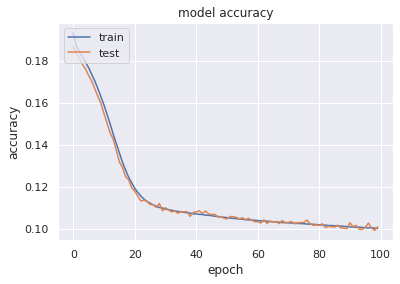

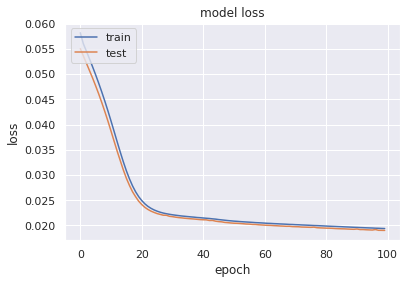

In [0]:
# summarize history for accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

summarize history for accuracy and loss:

**Bibliography**